# CNN 2 (Schrauben)

In [2]:
import numpy as np
from numpy import load
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

## Datensatz laden

In [4]:
X_train = load('Dataset_224x224/X_train.npy').astype(np.float32).reshape(-1, 224,224,1)
y_train = load('Dataset_224x224/y_train.npy')

X_test=load('Dataset_224x224/X_test.npy').astype(np.float32).reshape(-1,224,224,1)
y_test=load('Dataset_224x224/y_test.npy').astype(np.int32)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
y_train.shape

(7560, 224, 224, 1)


(7560, 6)

## Bild anzeigen

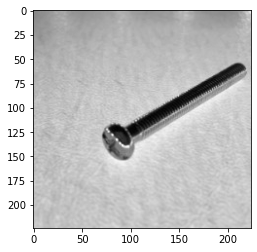

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(X_train[1],cmap='gray')

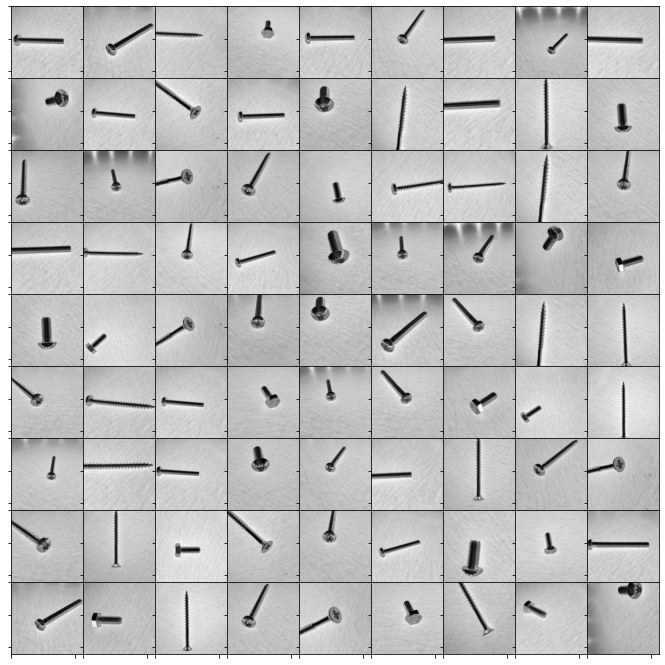

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

nrow = 9
ncol = 9


fig = plt.figure(figsize=(ncol+1, nrow+1)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
im = 0
for i in range(nrow):
    for j in range(ncol):
        ax= plt.subplot(gs[i,j])
        ax.imshow(X_train[im,:,:,0],cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

## Modell trainieren

```
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1,)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=10)
    
```

## Max Pooling

In [ ]:
# CNN (Max-Pooling, RELU)!

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(5, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(5, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train.reshape(10500, 28, 28, 1),
    y_train,
    epochs=55,
    batch_size=100)

## Dropout

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()

model.add(Conv2D(5, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation="sigmoid"))
# model.add(Dropout(0.25))

model.add(Dense(5, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train.reshape(10500, 28, 28, 1),
    y_train,
    epochs=25,
    batch_size=100)